In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image 

In [3]:
import cv2


In [11]:
img = cv2.imread(r"C:\Users\jyyjc\Desktop\archive (1)\casting_data\casting_data\test\def_front\cast_def_0_87.jpeg",0)
img = img/255
pred_img = img.copy()

In [8]:


train_path = r"C:\Users\jyyjc\Desktop\archive (1)\casting_data\casting_data\train"

test_path =  r"C:\Users\jyyjc\Desktop\archive (1)\casting_data\casting_data\test"

In [9]:
image_gen = ImageDataGenerator(rescale = 1/255,
                                 zoom_range = 0.1,
                                 brightness_range = [0.9,1.0],
                                 )

In [17]:
image_shape = (300, 300, 1)
batch_size = 32

train_data= image_gen.flow_from_directory(train_path,
                                            target_size= image_shape[:2],
                                            color_mode= "grayscale",
                                            classes = {'def_front':0, 'ok_front': 1},
                                            batch_size= batch_size,
                                            class_mode = 'binary',
                                            shuffle= True,
                                            seed= 0)
test_data = image_gen.flow_from_directory(test_path, 
                                          target_size= image_shape[:2],
                                          color_mode= 'grayscale',
                                          classes= {'def_front':0, 
                                                   'ok_front':0},
                                          batch_size = batch_size,
                                          class_mode = 'binary',
                                          shuffle = False,
                                          seed = 0)


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [18]:
train_set.class_indices

{'def_front': 0, 'ok_front': 1}

In [32]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(7,7), input_shape = image_shape,  activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), input_shape = image_shape, activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),input_shape = image_shape, activation='relu', padding = 'same'))
model.add(tf.keras.layers.Flatten())  

model.add(tf.keras.layers.Dense(units= 224, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) 

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
model.fit_generator(train_data, validation_data=test_data,epochs=10)

C:\Users\jyyjc\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1950: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
208/208 [==============================] - 184s 884ms/step - loss: 0.5810 - accuracy: 0.7446 - val_loss: 0.2998 - val_accuracy: 0.8601
Epoch 2/10
208/208 [==============================] - 183s 881ms/step - loss: 0.2917 - accuracy: 0.8762 - val_loss: 0.3204 - val_accuracy: 0.8727
Epoch 3/10
208/208 [==============================] - 183s 878ms/step - loss: 0.2340 - accuracy: 0.9000 - val_loss: 0.1679 - val_accuracy: 0.9273
Epoch 4/10
208/208 [==============================] - 183s 877ms/step - loss: 0.1493 - accuracy: 0.9415 - val_loss: 0.1019 - val_accuracy: 0.9524
Epoch 5/10
208/208 [==============================] - 184s 882ms/step - loss: 0.1176 - accuracy: 0.9555 - val_loss: 0.1193 - val_accuracy: 0.9469
Epoch 6/10
208/208 [==============================] - 185s 887ms/step - loss: 0.1198 - accuracy: 0.9528 - val_loss: 0.0657 - val_accuracy: 0.9776
Epoch 7/10
208/208 [==============================] - 183s 879ms/step - loss: 0.0749 - accuracy: 0.9738 - val_loss: 0.0585 -

In [37]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

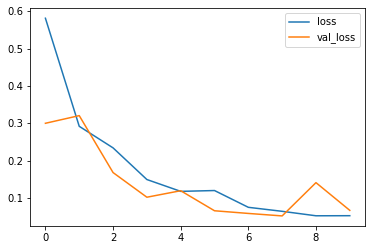

In [38]:
losses[['loss', 'val_loss']].plot()

<AxesSubplot:>

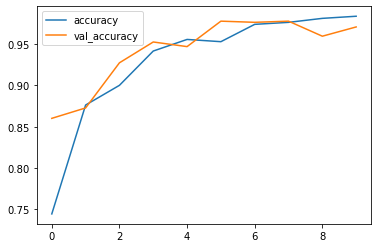

In [39]:
losses[['accuracy', 'val_accuracy']].plot()

In [40]:
pred_prob = model.predict_generator(test_set)

C:\Users\jyyjc\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2011: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [41]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
predictions = pred_prob > 0.5

In [43]:
print(classification_report(test_set.classes, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       453
           1       0.94      1.00      0.96       262

    accuracy                           0.97       715
   macro avg       0.97      0.98      0.97       715
weighted avg       0.97      0.97      0.97       715



In [46]:
import matplotlib.pyplot as plt


In [ ]:
#VGG16 

In [155]:
from tensorflow.keras.applications import VGG16

In [161]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, Model, Input

width_shape = 224
height_shape = 224

image_input = Input(shape=(width_shape, height_shape, 3))

2.6.0-dev20210520


In [162]:

baseModel = VGG16(weights="imagenet", include_top=False,
                  input_tensor= image_input)
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation='relu')(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(1, activation='sigmoid')(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
    layer.trainable = False

In [163]:
headModel

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_35')>

In [164]:
training_set = image_gen.flow_from_directory(train_path, 
                                                 target_size=(224, 224),
                                                 batch_size=batch_size, 
                                                 class_mode='binary')
test_set = image_gen.flow_from_directory(test_path, 
                                            target_size=(224, 224),
                                            batch_size=batch_size, 
                                            class_mode='binary')

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [165]:
print(training_set.class_indices)

{'def_front': 0, 'ok_front': 1}


In [166]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [137]:
H = model1.fit_generator(training_set,
                        steps_per_epoch=training_set.samples//batch_size,
                        validation_data=test_set,
                        epochs=5,
                        validation_steps=test_set.samples//batch_size)

Epoch 1/5
207/207 [==============================] - 321s 2s/step - loss: 0.3643 - accuracy: 0.9212 - val_loss: 0.1086 - val_accuracy: 0.9645
Epoch 2/5
207/207 [==============================] - 318s 2s/step - loss: 0.0530 - accuracy: 0.9853 - val_loss: 0.0506 - val_accuracy: 0.9858
Epoch 3/5
207/207 [==============================] - 318s 2s/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 0.0472 - val_accuracy: 0.9844
Epoch 4/5
207/207 [==============================] - 318s 2s/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.0664 - val_accuracy: 0.9787
Epoch 5/5
207/207 [==============================] - 318s 2s/step - loss: 0.0324 - accuracy: 0.9915 - val_loss: 0.0278 - val_accuracy: 0.9915


In [138]:
losses = pd.DataFrame(model1.history.history)

<AxesSubplot:>

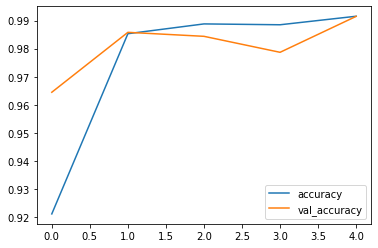

In [140]:
losses[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

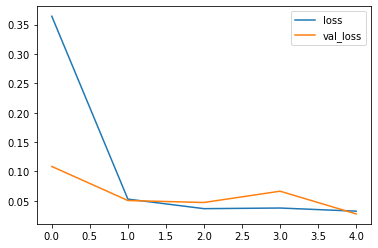

In [151]:
losses[['loss', 'val_loss']].plot()

In [152]:
pred_prob1 = model1.predict_generator(test_set)

C:\Users\jyyjc\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2011: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [153]:
predictions = pred_prob1 > 0.5

In [154]:
print(classification_report(test_set.classes, predictions))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       453
           1       0.39      0.40      0.40       262

    accuracy                           0.56       715
   macro avg       0.52      0.52      0.52       715
weighted avg       0.56      0.56      0.56       715

